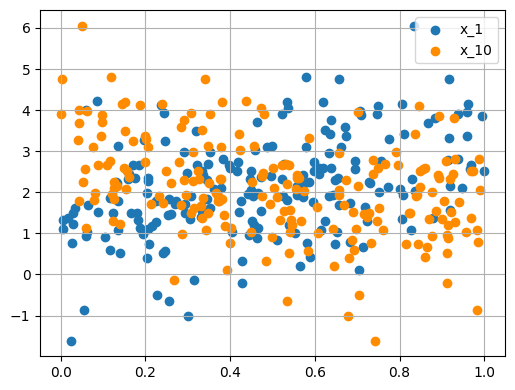

In [77]:
# STA2004 Programming assignment6
# Name: Ou Ziyi  Student ID:121090429
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import norm
import statsmodels.api as sm

# 2.2
n1 = 200 
n2 = 15
xij = []

for j in range(n2):   # generate xij
    xi = uniform.rvs(size = n1)
    xij.append(xi)

epsilon = norm.rvs(loc = 0, scale = 1, size = n1) # generate ε

y = []
for i in range(n1):
    yi = 1 + 1.7*xij[0][i] + 1.2*xij[1][i] + 0.8*xij[5][i] - 1.5*xij[9][i] + epsilon[i]
    y.append(yi)
    
plt.figure(figsize = (6,4.5))
plt.grid()
plt.scatter(xij[0],y, label = 'x_1')
plt.scatter(xij[9],y,color='darkorange', label = 'x_10')
plt.legend(loc='upper right')



In [78]:
x = np.transpose(np.array(xij))
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
beta = np.transpose(np.mat(results.params))
beta_coef = np.transpose(np.delete(beta,0))

y_hat = results.fittedvalues

SSE = np.sum((y - y_hat) ** 2)
SSR = np.sum((y_hat - np.mean(y)) ** 2)
R_square = SSR / (SSE+SSR)
print('The SSE is {}'.format(SSE))
print('The SSR is {}'.format(SSR))
print('The sum of SSE and SSR is {}'.format(SSE+SSR))
print('The TSS is {}'.format(SSE+SSR))
print('The R^2 is {}'.format(R_square))
print('The errors variance is {}'.format(SSE/n1))

The SSE is 164.41071541593925
The SSR is 112.55504058336473
The sum of SSE and SSR is 276.96575599930395
The TSS is 276.96575599930395
The R^2 is 0.4063861258849906
The errors variance is 0.8220535770796963


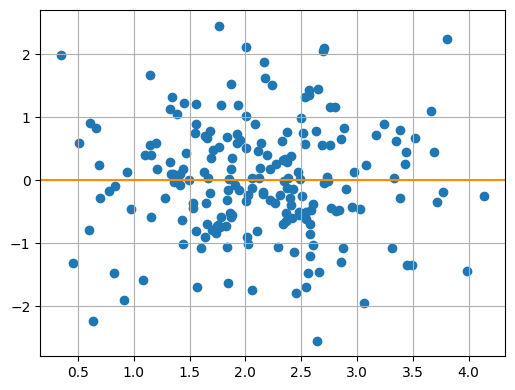

In [79]:
residual = y - y_hat
plt.figure(figsize = (6,4.5))
plt.grid()
plt.scatter(y_hat,residual)
plt.axhline(0, color = 'darkorange')

In [80]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     8.398
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.87e-14
Time:                        13:04:06   Log-Likelihood:                -264.19
No. Observations:                 200   AIC:                             560.4
Df Residuals:                     184   BIC:                             613.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4284      0.474      3.012      0.003       0.493       2.364
x1             1.8153      0.264      6.880      0.000       1.295       2.336
x2             0.8971      0.237      3.791      0.000       0.430       1.364
x3            -0.2300      0.236     -0.974      0.332      -0.696       0.236
x4             0.1280      0.237      0.540      0.590      -0.339       0.595
x5            -0.0102      0.235     -0.043      0.965      -0.474       0.453
x6             0.5779      0.248      2.331      0.021       0.089       1.067
x7             0.0764      0.256      0.298      0.766      -0.429       0.582
x8             0.2565      0.229      1.120      0.264      -0.195       0.708
x9            -0.1813      0.243     -0.745      0.457      -0.661       0.299
x10           -1.7286      0.239     -7.230      0.000      -2.200      -1.257
x11           -0.0910      0.240     -0.380      0.705      -0.564       0.382
x12           -0.0682      0.224     -0.304      0.761      -0.510       0.374
x13           -0.0145      0.226     -0.064      0.949      -0.461       0.432
x14            0.2212      0.228      0.971      0.333      -0.229       0.671
x15           -0.1857      0.233     -0.799      0.426      -0.645       0.273
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.146
Skew:                           0.059   Prob(JB):                        0.930
Kurtosis:                       3.059   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""